# Forecasting a binary variable using classification algorithms (KNN, Decision tree and SVC)

## 1. Overview

The data set used in this analysis contains information from 8000 patients, the features listed below and the class target variable that takes the value 0 if the patient has never used drugs or 1 if the patient has used drugs at some point. 

- **F1:** age
- **F2:** education
- **F3:** country of origin
- **F4:** Ethnicity
- **F5:** nscore
- **F6:** escore
- **F7:** oscore
- **F8:** ascore
- **F9:** cscore
- **F10:** impulsivity
- **F11:** sensation seeing

Based on the 11 features listed above, this analysis aims to establish if a person will be likely or not to use drugs based on the 11 factors. 

## 2. Clasification methods and assessment metrics

I will use three differnt classification algorithms to forecast the class variable: K-nearest neighbors, Decision Tree Classification and Suport vector classification. All the three methods will be asses using the following paramenters: 

1. **Sensitivity** is also known as the true positive rate. This is the proportion of all individuals who were correctly predicted as positive out of the number of true positives.
2. **Specificity** is also known as the true negative rate. This is the proportion of all individuals who were correctly predicted as negative out of the number of true negatives.
3. **The positive prediction rate**. This is the proportion of correctly predicted positive individuals out of the number of predicted positives.
4. **The correct classification**. This is the number of correct classification  out of the total number of observations. 

#### 2.1 K-nearest neighbors

K nearest neighbours (KNN) is a non-parametric classification/regression method that belongs to the class of supervised ML algorithms. The model is not based on a family of probability distributions; therefore, we don't require to make any assumptions for the data distribution. For each point we look at the k nearest labelled points to it, we predict the class of this point to be the class that the majority of its neighbours shares, e.g. if k = 5 and of the 5 neighbouring points, one is class 4, one is class 3 and three are class 2 then we predict the point belongs to class 2.

I will implement a kNN algorithm with Python and Scikit-Learn. Link to documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

#### 2.2 Decision trees
Classification trees are another type of nonparametric classification and partitioning method, and it also belongs to the class of supervised learning algorithms. Depending on the target variables, we have two different types of trees. 

- <u>Regression trees:</u> where the predicted outcome is a continuous variable and
- <u>Decision/Classification trees:</u> where the predicted outcome is a categorical variable (either ordinal or nominal).

There are six main components on each tree: 

- <u>Root Node:</u> This represents the entire population of the data set.
- <u>Splitting:</u> This is the process of dividing/splitting a node into two (or more) newnodes (often known as “daughter”
nodes).
- <u>Decision/internal Node:</u> When a new node is split into further nodes, then it is called a decision/internal node.
- <u>Leaf/Terminal node:</u> Nodes that do not split into further nodes are called terminal (also known as leaf/leaves).
- <u>Subtree:</u> A subsection of the tree is called a subtree.
- <u>Branch:</u> A subtree that is only one side of a split from a node. (Each split is made up of branches.)

I will implement a Decision trees algorithm with Python and Scikit-Learn. Link to documentation [here.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### 2.3 Support Vector Machines

Support vector classification is a non-parametric supervised ML algorithm like the previous two methods. They are binary classification methods, i.e. used for classification problems with only 2 classes. They can be generalised to multi-class problems. In summary, the concept behind SVM  is to try to fit a hyperplane that splits the points of the two classes into separate regions (a separating hyperplane). Some concepts of SVM to keep in mind: 

- <u>Hyperplane:</u> This is the boundary that separates data points from different classes
- <u>Support vector:</u> These are the data points that are closes of the hyperplane
- <u>Margin:</u> is a separation gap between the two lines on the closest data points.

I will implement a SVM algorithm with Python and Scikit-Learn. Link to documentation [here.](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

## 3. Fine-tunning the models

To find the best possible combination of parameters first, I will split the data set into train and test with a 70/30 percent proportion. Then I will apply cross-validation on the training dataset using the GridSearchCV function from the Scikit-Learn library. Link to the documentation [here](https://scikitlearn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

# 4. Load data and perform exploratory analysis

In [1]:
# General libraries
import numpy as np
import pandas as pd

#Plot libraries
import seaborn as sns

#Analytics libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load data and
data = pd.read_csv("DrugUse.csv", sep=";")

In [4]:
#Print shape and top/bottom 5 rows
data

,Age,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Class
0,0.49788,-122.75100,0.96082,-0.31685,0.31287,-0.69509,-0.45174,-0.45321,-0.14277,0.19268,0.76540,0
1,109.44900,-0.05921,0.96082,-0.31685,-155.07800,0.96248,-0.31776,-0.45321,0.25953,-0.21712,-154.85800,0
2,0.49788,-0.05921,0.96082,-0.31685,0.31287,-123.17700,-0.01928,0.76096,0.12331,-0.71126,-0.84637,0
3,0.49788,-0.05921,0.24923,-0.31685,0.62967,257.30900,-0.97631,0.76096,113.40700,-137.98300,-154.85800,0
4,-0.95197,0.45468,-0.28519,-0.31685,0.22393,0.32197,244.90400,0.43852,-164.10100,0.19268,-0.21575,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.07854,-17.37900,0.96082,-0.31685,0.91093,-0.15487,-221.06900,0.28783,130.61200,-137.98300,-207.84800,0
7996,-0.07854,198.43700,0.96082,-0.31685,-221.84400,-0.94779,-0.71727,0.13136,-0.52745,-0.71126,0.76540,0
7997,109.44900,116.36500,0.96082,-0.31685,102.11900,-0.15487,0.29338,111.40600,146.19100,-137.98300,-154.85800,0
7998,109.44900,-0.05921,0.96082,-0.31685,-0.92104,-0.30033,-155.52100,-0.01729,0.12331,-137.98300,-154.85800,0


In [5]:
#Print the summary of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        8000 non-null   float64
 1   Education  8000 non-null   float64
 2    Country   8000 non-null   float64
 3   Ethnicity  8000 non-null   float64
 4   Nscore     8000 non-null   float64
 5   Escore     8000 non-null   float64
 6   Oscore     8000 non-null   float64
 7   Ascore     8000 non-null   float64
 8   Cscore     8000 non-null   float64
 9   Impulsive  8000 non-null   float64
 10  SS         8000 non-null   float64
 11  Class      8000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 750.1 KB


In [6]:
#Summary statistics of the dataset
round(data.describe(),2)

,Age,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Class
count,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00
mean,26.90,11.27,0.32,-1.74,1.84,-2.38,5.59,0.49,1.45,1.26,-8.07,0.49
std,57.47,73.92,0.71,14.89,83.57,78.75,88.08,81.47,87.12,84.44,75.39,0.50
min,-0.95,-243.59,-0.57,-110.70,-346.44,-327.39,-327.39,-346.44,-346.44,-255.52,-207.85,0.00
25%,-0.95,-0.61,-0.57,-0.32,-0.68,-0.70,-0.58,-0.76,-0.65,-0.71,-0.53,0.00
50%,-0.08,-0.06,0.96,-0.32,0.04,0.00,-0.02,-0.02,-0.01,0.19,0.08,0.00
75%,0.50,0.45,0.96,-0.32,0.74,0.64,0.72,0.76,0.58,0.88,0.77,1.00
max,259.17,198.44,0.96,190.72,327.39,327.39,290.16,346.44,346.44,290.16,192.17,1.00


In [7]:
#Count the number of observations for each target class
data["Class"].value_counts()

0    4100
1    3900
Name: Class, dtype: int64

In [8]:
# Check for missing values

#Get the columsn that have missing values
data_null = data.columns[data.isnull().any()]
data_null

Index([], dtype='object')

In [9]:
#Split dataset into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(data, data["Class"], test_size = 0.3) # 70% train and 30% test

In [10]:
#Print shape of train and test  datasets
print("X_test shape is = " + str(X_train.shape))
print("y_train shape is = " + str(y_train.shape))
print("X_train shape is = " + str(X_test.shape))
print("y_test shape is = " + str(y_test.shape))

X_test shape is = (5600, 12)
y_train shape is = (5600,)
X_train shape is = (2400, 12)
y_test shape is = (2400,)


# 1. K-nearest neighbors

In [11]:
#Initiate the KKN model with default paramenters
initial_KNN = KNeighborsClassifier()

#Create a dictionary with the ragen of paramenters we want to test
param_dict_KNN = {
    "n_neighbors": range(1,10),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": range(1,10)
}

In [12]:
#Create a GridSearch object with the parameters specified above
grid_search_KNN = GridSearchCV(estimator = initial_KNN, 
                               param_grid = param_dict_KNN, 
                               scoring = "accuracy", 
                               cv = 5,
                               verbose = 0,
                               n_jobs = -1)

#Fit the GridSearch object on the train data to find the best combination of parameters
grid_search_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 10), 'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [13]:
#Print the best paramenters of the model 
grid_search_KNN.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 8,
 'weights': 'distance'}

In [14]:
#Create the KNN model using the above parameters
final_KNN = KNeighborsClassifier(n_neighbors = 8, 
                                 weights = "distance", 
                                 algorithm = "ball_tree", 
                                 leaf_size = 1)

#Fit the model using the tran dataset 
final_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=8,
                     weights='distance')

In [15]:
#Calcualte predicted values using the test dataset
y_pred_KNN = final_KNN.predict(X_test)

In [16]:
#Print the accuracy of the model on the test dataset
KNN_accuracy = metrics.accuracy_score(y_test, y_pred_KNN)*100
print("The accuracy of the KNN model in the test dataset is: {:.2f}%".format(KNN_accuracy))

The accuracy of the KNN model in the test dataset is: 98.46%


<AxesSubplot:>

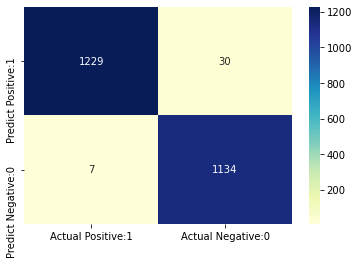

In [17]:
#Calculate the confusion matrix
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)

#Plot confusion matrix using seaborn heatmap

cm_matrix_KNN = pd.DataFrame(data = conf_matrix_KNN, columns = ['Actual Positive:1', 'Actual Negative:0'], 
                                 index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_KNN, annot = True, fmt = "d", cmap ="YlGnBu")

In [18]:
#Print the four values of the confusion matrix
TP_KNN = conf_matrix_KNN[0,0]
TN_KNN = conf_matrix_KNN[1,1]
FP_KNN = conf_matrix_KNN[0,1]
FN_KNN = conf_matrix_KNN[1,0]

print("True positive (TP) is : {}".format(TP_KNN))
print("True negative (TN) is : {}".format(TN_KNN))
print("False positive (FP) is : {}".format(FP_KNN))
print("False negative (FN) is : {}".format(FN_KNN))

True positive (TP) is : 1229
True negative (TN) is : 1134
False positive (FP) is : 30
False negative (FN) is : 7


In [19]:
#Calculate sensitivity, specificity and the positive/negative prediction rate
sensitivity_KNN = round((TP_KNN/(TP_KNN+FN_KNN))*100, 2)
specificity_KNN = round((TN_KNN/(TN_KNN+FP_KNN))*100, 2)
PositivePredictionRate_KNN = round((TP_KNN/(TP_KNN+FP_KNN))*100, 2)
NegativePredictionRate_KNN = round((TN_KNN/(TN_KNN+FN_KNN))*100, 2)

print("The sensitivity for the KNN  model is : {}%".format(sensitivity_KNN))
print("The specificity for the KNN  model is : {}%".format(specificity_KNN))
print("The positive prediction rate for the KNN  model is : {}%".format(PositivePredictionRate_KNN))
print("The negative prediction rate for the KNN  model is : {}%".format(NegativePredictionRate_KNN))

The sensitivity for the KNN  model is : 99.43%
The specificity for the KNN  model is : 97.42%
The positive prediction rate for the KNN  model is : 97.62%
The negative prediction rate for the KNN  model is : 99.39%


In [20]:
#We can also obtain the above resitls from the classification_report function
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1259
           1       0.97      0.99      0.98      1141

    accuracy                           0.98      2400
   macro avg       0.98      0.99      0.98      2400
weighted avg       0.98      0.98      0.98      2400



# 2. Decision Tree Classification

In [21]:
#Initiate the KKN model with default paramenters
initial_DecisionTree = DecisionTreeClassifier()

#Create a dictionary with the ragen of paramenters we want to test
param_dict_DT = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,25)
}

In [22]:
#Create a GridSearch object with the parameters specified above
grid_search_DT = GridSearchCV(estimator = initial_DecisionTree, 
                    param_grid = param_dict_DT,
                    scoring = "accuracy",
                    cv = 5,
                    verbose = 0,
                    n_jobs = -1)

#Fit the GridSearch object on the train data to find the best combination of parameters
grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 25),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy')

In [23]:
#Print the best paramenters of the model 
grid_search_DT.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [24]:
#Create the Decision Tree model using the above parameters
decision_tree_final = DecisionTreeClassifier(criterion = "gini", 
                                             max_depth = 1, 
                                             min_samples_leaf = 1, 
                                             min_samples_split = 2)

#Fit the model using the tran dataset 
decision_tree_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [25]:
#Calcualte predicted values using the test dataset
y_pred_DT = decision_tree_final.predict(X_test)

[Text(167.4, 163.07999999999998, 'X[11] <= 0.5\ngini = 0.5\nsamples = 5600\nvalue = [2841, 2759]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2841\nvalue = [2841, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2759\nvalue = [0, 2759]')]

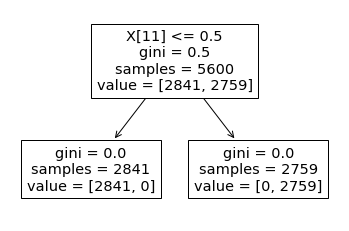

In [26]:
#Plot the decision tree
tree.plot_tree(decision_tree_final)

In [27]:
#Print the accuracy of the model on the test dataset
DT_accuracy = metrics.accuracy_score(y_test, y_pred_DT)*100
print("The accuracy of the Decision tree model in the test dataset is: {:.2f}%".format(DT_accuracy))

The accuracy of the Decision tree model in the test dataset is: 100.00%


<AxesSubplot:>

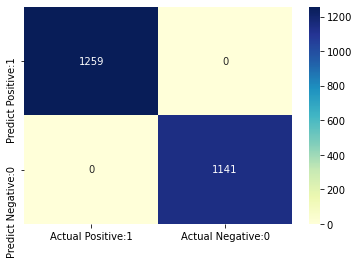

In [28]:
#Calculate the confusion matrix
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)

#Plot confusion matrix using seaborn heatmap

cm_matrix_DT = pd.DataFrame(data = conf_matrix_DT, columns = ["Actual Positive:1", "Actual Negative:0"], 
                                 index = ["Predict Positive:1", "Predict Negative:0"])

sns.heatmap(cm_matrix_DT, annot = True, fmt = "d", cmap ="YlGnBu")

In [29]:
#Print the four values of the confusion matrix
TP_DT = conf_matrix_DT[0,0]
TN_DT = conf_matrix_DT[1,1]
FP_DT = conf_matrix_DT[0,1]
FN_DT = conf_matrix_DT[1,0]

print("True positive (TP) is : {}".format(TP_DT))
print("True negative (TN) is : {}".format(TN_DT))
print("False positive (FP) is : {}".format(FP_DT))
print("False negative (FN) is : {}".format(FN_DT))

True positive (TP) is : 1259
True negative (TN) is : 1141
False positive (FP) is : 0
False negative (FN) is : 0


In [30]:
#Calculate sensitivity, specificity and the positive/negative prediction rate
sensitivity_DT = round((TP_DT / (TP_DT + FN_DT))*100, 2)
specificity_DT = round((TN_DT / (TN_DT + FP_DT))*100, 2)
PositivePredictionRate_DT = round((TP_DT / (TP_DT + FP_DT))*100, 2)
NegativePredictionRate_DT = round((TN_DT / (TN_DT + FN_DT))*100, 2)

print("The sensitivity for the decision tree model is : {}%".format(sensitivity_DT))
print("The specificity for the decision tree model is : {}%".format(specificity_DT))
print("The positive prediction rate for the decision tree model is : {}%".format(PositivePredictionRate_DT))
print("The negative prediction rate for the decision tree model is : {}%".format(NegativePredictionRate_DT))

The sensitivity for the decision tree model is : 100.0%
The specificity for the decision tree model is : 100.0%
The positive prediction rate for the decision tree model is : 100.0%
The negative prediction rate for the decision tree model is : 100.0%


In [31]:
#We can also obtain the above resitls from the classification_report function
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1259
           1       1.00      1.00      1.00      1141

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



# 3. Suport vector classification

**Note:** When we run GridSearchCV we need to keep in mind that the number of interactions require grows exponentially depending on the number of parameters and different options for each of them. For SVC the running time was substantially higher compared to the previous two models. To mitigate this, I ran separately three different SVC with a different kernel. In this case, the kernel that returned the highest accuracy was the Radial basis function. Now we can run GridSearchCV with a smaller number of parameters. 

In [32]:
#Run SVC with a Radial basis function kernel 
svc_rbf = SVC(kernel = "rbf") 

#Fit classifier to training set
svc_rbf.fit(X_train,y_train)

#Make predictions on test set
y_pred = svc_rbf.predict(X_test)

#Print the accuracy of the model on the test dataset
svc_rbf_accuracy = metrics.accuracy_score(y_test, y_pred)*100
svc_rbf_accuracy

77.16666666666666

In [33]:
#Run SVC with a Polynomial kernel 
svc_poly = SVC(kernel = "poly") 

#Fit classifier to training set
svc_poly.fit(X_train,y_train)

#Make predictions on test set
y_pred = svc_poly.predict(X_test)

#Print the accuracy of the model on the test dataset
svc_poly_accuracy = metrics.accuracy_score(y_test, y_pred)*100
svc_poly_accuracy

72.875

In [34]:
#Run SVC with a Polynomial kernel 
svc_sigmoid = SVC(kernel = "sigmoid") 

#Fit classifier to training set
svc_sigmoid.fit(X_train,y_train)

#Make predictions on test set
y_pred = svc_sigmoid.predict(X_test)

#Print the accuracy of the model on the test dataset
svc_sigmoid_accuracy = metrics.accuracy_score(y_test, y_pred)*100
svc_sigmoid_accuracy

63.16666666666667

In [35]:
#Initiate the model with all default paramenters 
initial_svc = SVC() 

#Create a dictionary with the ragen of paramenters we want to test.
param_dict_svc = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["rbf"],
    "gamma": [1, 0.1, 0.01, 0.001]
}             

In [36]:
#Create a GridSearch object with the parameters specified above
grid_search_svc = GridSearchCV(estimator = initial_svc,  
                           param_grid = param_dict_svc,
                           scoring = "accuracy",
                           cv = 5,
                           verbose = 0,
                           n_jobs = -1)

#Fit the GridSearch object on the train data to find the best combination of parameters
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [37]:
#Print the best paramenters of the model 
grid_search_svc.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [38]:
#Create the Suport Vector Machine model using the above parameters
svc_final = SVC(C=10, gamma=1, kernel="rbf")

#Fit the model using the tran dataset 
svc_final.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [39]:
#Calcualte predicted values using the test dataset
y_pred_svc = svc_final.predict(X_test)

In [40]:
#Print the accuracy of the model on the test dataset
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)*100
print("The accuracy of the Suport Vector Machine model in the test dataset is: {:.2f}%".format(svc_accuracy))

The accuracy of the Suport Vector Machine model in the test dataset is: 99.25%


<AxesSubplot:>

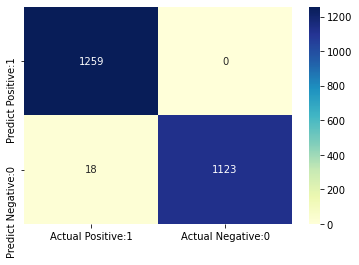

In [41]:
#Calculate the confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

#Plot confusion matrix using seaborn heatmap

cm_matrix_svc = pd.DataFrame(data = conf_matrix_svc, columns = ['Actual Positive:1', 'Actual Negative:0'], 
                                 index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_svc, annot = True, fmt = "d", cmap ="YlGnBu")

In [42]:
#Print the four values of the confusion matrix
TP_svc = conf_matrix_svc[0,0]
TN_svc = conf_matrix_svc[1,1]
FP_svc = conf_matrix_svc[0,1]
FN_svc = conf_matrix_svc[1,0]

print("True positive (TP) is : {}".format(TP_svc))
print("True negative (TN) is : {}".format(TN_svc))
print("False positive (FP) is : {}".format(FP_svc))
print("False negative (FN) is : {}".format(FN_svc))

True positive (TP) is : 1259
True negative (TN) is : 1123
False positive (FP) is : 0
False negative (FN) is : 18


In [43]:
#Calculate sensitivity, specificity and the positive/negative prediction rate
sensitivity_svc = round((TP_svc / (TP_svc + FN_svc))*100, 2)
specificity_svc = round((TN_svc / (TN_svc + FP_svc))*100, 2)
PositivePredictionRate_svc = round((TP_svc / (TP_svc + FP_svc))*100, 2)
NegativePredictionRate_svc = round((TN_svc / (TN_svc + FN_svc))*100, 2)

print("The sensitivity for the decision tree model is : {}%".format(sensitivity_svc))
print("The specificity for the decision tree model is : {}%".format(specificity_svc))
print("The positive prediction rate for the decision tree model is : {}%".format(PositivePredictionRate_svc))
print("The negative prediction rate for the decision tree model is : {}%".format(NegativePredictionRate_svc))

The sensitivity for the decision tree model is : 98.59%
The specificity for the decision tree model is : 100.0%
The positive prediction rate for the decision tree model is : 100.0%
The negative prediction rate for the decision tree model is : 98.42%


In [44]:
#We can also obtain the above resitls from the classification_report function
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1259
           1       1.00      0.98      0.99      1141

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400



# Conclusion

After running the three methods, we can see that all of them performed really well. All of them returned accuracy above 99% in the test dataset. But Decision Tree Classification was able to achieve 100% accuracy on the test dataset, so it is clearly my prefered option. 